## Import Important Libraries

In [2]:
import qiskit as q
import qiskit.visualization as qv
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor
import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

## Making the Desired Quantum Circuit

In [3]:
circuit = QuantumCircuit(2,1)
circuit.h(0); circuit.measure(0,0); circuit.barrier() # Creating and Ensamble of 50% |0> and 50% |1>
circuit.h(1); circuit.barrier()  # QC Creates a superposition of [1/Sqrt(2)]{ |0> + |1> } to decide to flip or not
circuit.cx(0,1);circuit.barrier() # Randomly decide whether to later flip or not
circuit.h(1);circuit.barrier() # QC again decides whether to flip or not
circuit.measure(1,0) # Measure the Final Result
circuit.draw()

┌───┐┌─┐ ░       ░       ░       ░    
q_0: ┤ H ├┤M├─░───────░───■───░───────░────
     └───┘└╥┘ ░ ┌───┐ ░ ┌─┴─┐ ░ ┌───┐ ░ ┌─┐
q_1: ──────╫──░─┤ H ├─░─┤ X ├─░─┤ H ├─░─┤M├
           ║  ░ └───┘ ░ └───┘ ░ └───┘ ░ └╥┘
c: 1/══════╩═════════════════════════════╩═
           0                             0

# Running the Circuit via QASM Simulator and checking Results (More the shots, better the probability distribution)

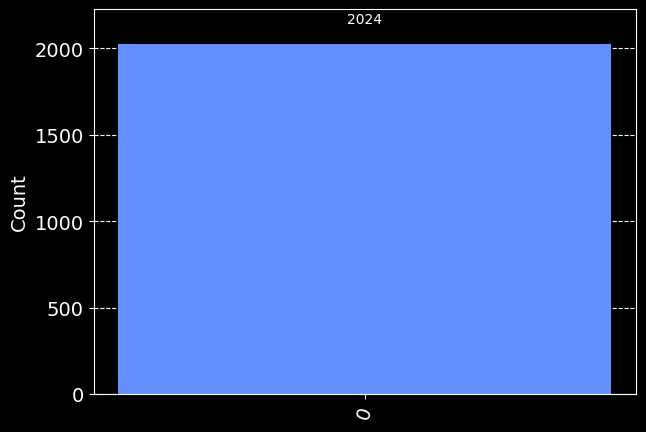

In [4]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

# Loading your account and Running the Circuit via Least Busy Quantum Computer and checking Results

In [4]:
# SAVING AND LOADING YOUR IBM API TOKEN YOU GET WHEN YOU SIGN UP AT IBM QUANTUM COMPUTING 
IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))

C:\Users\Sanket Lalwani\AppData\Local\Temp\ipykernel_3756\4250883806.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
configrc.store_credentials:WARNING:2023-03-27 01:49:26,450: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
#Executing the Circuit on Least Busy Quantum Computer
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job is queued (20)    

## Retrieving Job

In [5]:
# Load your IBM Quantum account
account = IBMQ.load_account()

# Retrieve the job using the job ID
job = account.get_backend('ibmq_manila').retrieve_job('63f226f62a88b6b2dbe25a02')

# Monitor the job to check its status
job_monitor(job)
# Get the result from the job
result = job.result()

ibmqfactory.load_account:WARNING:2023-03-27 01:49:43,093: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
